<a href="https://colab.research.google.com/github/felipe-lazzaron/OptiRoute-Efficient-Vehicle-Routing-with-Parallel-Computing/blob/main/Luiz_Felipe_Lazzaron_Supercomp_Projeto_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto SuperComputação 2024.1

## Otimização de Rotas de Veículos (_Vehicle Routing Problem_ - VRP)

**Objetivo:**

Desenvolver uma aplicação em C++ que otimize as rotas de uma frota de veículos destinados à entrega de produtos a diversos clientes, buscando minimizar o custo total das rotas.


**Descrição:**

Você está encarregado de criar uma solução computacional para o problema de Otimização de Rotas de Veículos (VRP) para uma empresa de logística. A empresa possui uma frota de veículos que são usados para entregar produtos a uma série de clientes. Cada veículo tem uma capacidade de carga máxima, e cada cliente tem uma demanda específica que deve ser atendida. O objetivo é determinar as rotas ótimas para os veículos, de forma que todos os clientes sejam atendidos, respeitando as restrições de capacidade dos veículos, e minimizando o custo total das entregas.


**Restrições e Requisitos:**
1. **Capacidade dos Veículos:** Cada veículo tem uma capacidade máxima de carga que não pode ser excedida.
2. **Demanda dos Clientes:** Cada cliente tem uma demanda específica que deve ser completamente atendida por um único veículo.
3. **Custo da Rota:** Cada rota possui um custo, que simboliza o cômputo agregado da distância percorrida, do tempo de entrega, e do consumo de combustível. O objetivo é minimizar o custo total.
4. **Número máximo de visitas por rota:** Cada rota pode visitar um número máximo de cidades.
5. **Ponto de Partida e Chegada:** Todos os veículos começam e terminam suas rotas no depósito da empresa.


**Desafios Computacionais:**

- O VRP é um problema NP-difícil, o que significa que sua complexidade computacional cresce exponencialmente com o aumento do número de clientes e veículos.
- A busca exaustiva por todas as possíveis combinações de rotas torna-se impraticável para instâncias maiores do problema.


**Composição da Solução:**
1. Implementação de um algoritmo de _busca global_ para o problema (força bruta);
2. Implementação de alguma solução aproximada (_heurística_ ou _busca local_);
3. Implementação de 2 soluções paralelizadas, sendo:

  a. _Paralelização com Threads OpenMP_: Utilizar threads e a biblioteca OpenMP para paralelizar o algoritmo desenvolvido, com o objetivo de reduzir o tempo de execução. Analisar e implementar a paralelização de componentes do algoritmo que possam se beneficiar da execução concorrente, como a geração de soluções iniciais ou a busca local.

  b. _Paralelização e Distribuição do Processamento com MPI_: Implementar uma versão do algoritmo que utilize a interface de passagem de mensagens MPI para distribuir o processo de busca de soluções em múltiplos processos, possivelmente executando em diferentes nós de um cluster. A estratégia deve permitir a exploração paralela do espaço de soluções e a troca eficiente de informações entre os processos.



**Entregáveis:**

1. **Código Fonte:** Código fonte em C++ comentado e organizado.
2. **Relatório:** Um relatório descrevendo a abordagem utilizada, incluindo descrição das heurísticas e métodos de busca local, bem como as estratégias de paralelização adotadas.
3. **Análise de Desempenho:** Uma análise de desempenho da solução proposta, incluindo tempos de execução e qualidade das soluções encontradas, com base em instâncias de teste de diferentes tamanhos.
4. **Instruções de Uso:** Breve documentação sobre como compilar e executar a aplicação, incluindo exemplos de uso.


**DICA**:
Não deixe de estudar os exemplos deste link https://vrpy.readthedocs.io/en/master/examples.html, para entender como gerar a avaliar soluções para o problema. Compare sua solução com a solução desta biblioteca!

### GERAÇÃO DE INSTÂNCIAS DO PROBLEMA

Execute o código abaixo algumas vezes gerando instâncias de tamanhos e complexidades distintas. Você deve experimentar alterações de:
- **num_nos**: número de cidades a serem visitados;
- **probabilidade**: a probabilidade de ser criada uma rota direta entre 2 cidades;


In [22]:
import random
# from networkx import set_node_attributes

def gerar_dicionario_demandas(N):
    """
    Gera um dicionário onde a chave é um int de 1 até N e o valor é um inteiro aleatório de 1 até 10.

    :param N: Número máximo para as chaves do dicionário.
    :return: Dicionário com chaves de 1 até N e valores inteiros aleatórios de 1 até 10.
    """
    return {i: random.randint(1, 10) for i in range(1, N)}


def gerar_entradas_grafo(num_nos, max_peso=100, probabilidade=0.25):
    """
    Gera um grafo para o problema de otimização de rotas de veículos.

    :param num_nos: Número de nós no grafo, incluindo o depósito.
    :param max_peso: Peso máximo para as arestas do grafo.
    :param probabilidade: Probabilidade de criar uma rota entre duas cidades.
    :return: Um dicionário representando o grafo onde as chaves são tuplas representando as arestas (nó1, nó2)
             e os valores são os pesos dessas arestas.
    """
    grafo = {}
    # Gerar pesos para arestas entre o depósito e outros nós
    for i in range(1, num_nos):
        grafo[(0, i)] = random.randint(1, max_peso)
        grafo[(i, 0)] = grafo[(0, i)]  # Assume que a distância de volta ao depósito é a mesma

    # Gerar pesos para arestas entre todos os outros pares de nós
    for i in range(1, num_nos+1):
        for j in range(i+1, num_nos):
            if random.random() > (1 - probabilidade):  # Verifica a probabilidade
                peso = random.randint(1, max_peso)
                grafo[(i, j)] = peso

    return grafo

############################################
#             Exemplo de uso
############################################
num_nos = 10                                   # Número total de nós incluindo o depósito
demandas = gerar_dicionario_demandas(num_nos)  # Gera as demandas para cada nó
grafo = gerar_entradas_grafo(num_nos)          # Gera o grafo que representa os locais e custos entre eles

# Salva o grafo em um arquivo TXT
with open('grafo.txt', 'w') as arquivo:
  arquivo.write(str(num_nos) + "\n")    # Número de nós, incluindo depósito
  for local, demanda in demandas.items():
    linha = f"{local} {demanda}\n"      # Par LOCAL DEMANDA
    arquivo.write(linha)

  arquivo.write(str(len(grafo)) + "\n") # Número de arestas
  for aresta, peso in grafo.items():
    linha = f"{aresta[0]} {aresta[1]} {peso}\n" # Trio: ORIGEM DESTINO CUSTO
    arquivo.write(linha)


### GERAÇÃO DE SOLUÇÕES

Instale a biblioteca [VRPy](https://vrpy.readthedocs.io/en/latest/getting_started.html) para resolver problemas de otimização de rotas.

Para cada instância do problema gerada, execute este código para gerar a solução esperada.

Não deixe de estudar a documentação da biblioteca! Especialmente este link: https://vrpy.readthedocs.io/en/latest/examples.html#a-simple-example

Aqui você pode gerar soluções diferentes alterando:
- **load_capacity**: a quantidade e capacidade de veículos;
- **num_stops**: o número máximo de paradas numa rota;

In [23]:
!pip install vrpy

In [24]:
from networkx import DiGraph, set_node_attributes
from vrpy import VehicleRoutingProblem


def ler_arquivo_grafo(caminho_arquivo):
    with open(caminho_arquivo, 'r') as arquivo:
        # Lê o número de nós
        N = int(arquivo.readline().strip())-1

        # Lê as demandas dos nós
        demandas = {}
        for _ in range(N):
            linha = arquivo.readline().strip().split()
            id_no, demanda = int(linha[0]), int(linha[1])
            demandas[id_no] = demanda

        # Lê o número de arestas
        K = int(arquivo.readline().strip())

        # Lê as arestas
        arestas = []
        for _ in range(K):
            linha = arquivo.readline().strip().split()
            origem, destino, peso = int(linha[0]), int(linha[1]), int(linha[2])
            arestas.append((origem, destino, peso))

    return demandas, arestas

############################################
#             Usando a funcao
############################################
caminho_arquivo = 'grafo.txt'
demandas, arestas = ler_arquivo_grafo(caminho_arquivo)

G = DiGraph()
for inicio, fim, custo in arestas:
    if inicio==0: inicio="Source"
    if fim==0: fim="Sink"
    G.add_edge(inicio, fim, cost=custo)

set_node_attributes(G, values=demandas, name="demand")

prob = VehicleRoutingProblem(G, load_capacity=15)  # Pode alterar a capacidade
prob.num_stops = 5                                 # Pode alterar o número máximo de paradas
prob.solve()

In [25]:
prob.best_routes

{1: ['Source', 8, 'Sink'],
 2: ['Source', 3, 4, 'Sink'],
 3: ['Source', 2, 'Sink'],
 4: ['Source', 5, 6, 7, 9, 'Sink'],
 5: ['Source', 1, 'Sink']}

In [26]:
prob.best_value

642

In [27]:
prob.best_routes_cost

{1: 40, 2: 102, 3: 140, 4: 214, 5: 146}

In [28]:
prob.best_routes_load

{1: 4, 2: 7, 3: 8, 4: 12, 5: 7}

# 0 Intro: Conhecendo a VRPy

In [169]:
from vrpy import VehicleRoutingProblem
import networkx as nx

# Criando um grafo de exemplo
G = nx.DiGraph()

# Adicionando nós Source e Sink
G.add_node("Source", demand=0)
G.add_node("Sink", demand=0)

# Adicionando as arestas com custos e demandas
G.add_edge("Source", 1, cost=1)
G.add_edge("Source", 2, cost=1)
G.add_edge(1, 3, cost=1, demand=1)
G.add_edge(2, 3, cost=1, demand=1)
G.add_edge(3, "Sink", cost=1)
G.add_edge(1, "Sink", cost=1)
G.add_edge(2, "Sink", cost=1)

# Definindo atributos nos nós (se necessário)
G.nodes[1]["demand"] = 1
G.nodes[2]["demand"] = 1
G.nodes[3]["demand"] = 1

# Definindo o problema
prob = VehicleRoutingProblem(G, load_capacity=4)

# Resolvendo o problema
prob.solve()

# Imprimindo a solução
print("Custo da melhor solução:", prob.best_value)
print("Rotas da melhor solução:", prob.best_routes)


Custo da melhor solução: 5
Rotas da melhor solução: {1: ['Source', 2, 'Sink'], 2: ['Source', 1, 3, 'Sink']}


## Tempo para calcular a melhor solução usando VRPY

Calculando para 1 locais...
Tempo para 1 locais: 0.0357 segundos
Calculando para 2 locais...
Tempo para 2 locais: 0.0375 segundos
Calculando para 3 locais...
Tempo para 3 locais: 0.0489 segundos
Calculando para 4 locais...
Tempo para 4 locais: 0.0476 segundos
Calculando para 5 locais...
Tempo para 5 locais: 0.0538 segundos
Calculando para 6 locais...
Tempo para 6 locais: 0.0568 segundos
Calculando para 7 locais...
Tempo para 7 locais: 0.0640 segundos
Calculando para 8 locais...
Tempo para 8 locais: 0.0701 segundos
Calculando para 9 locais...
Tempo para 9 locais: 0.0802 segundos
Calculando para 10 locais...
Tempo para 10 locais: 0.0884 segundos
Calculando para 11 locais...
Tempo para 11 locais: 24.1665 segundos
Calculando para 12 locais...
Tempo para 12 locais: 60.6992 segundos


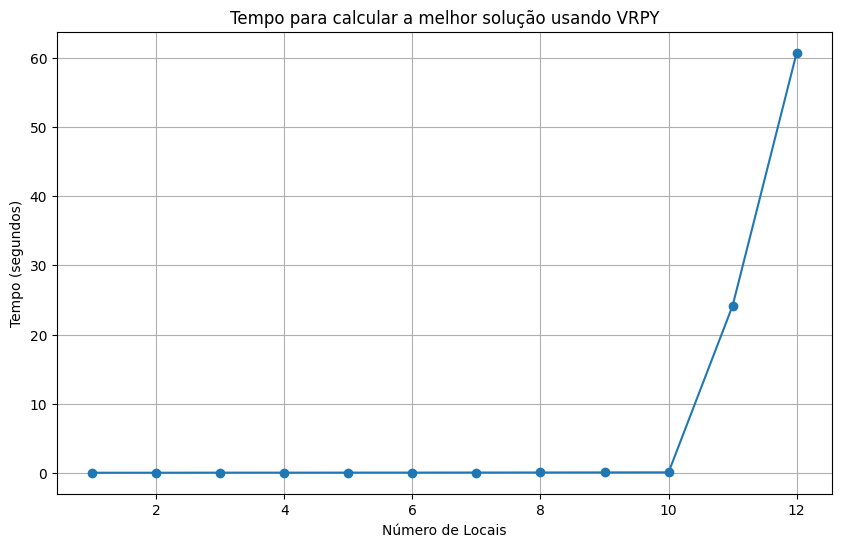

In [173]:
import time
import networkx as nx
from vrpy import VehicleRoutingProblem
import matplotlib.pyplot as plt

# Função para criar um grafo com n locais
def create_graph(n):
    G = nx.DiGraph()
    G.add_node("Source", demand=0)
    G.add_node("Sink", demand=0)

    for i in range(1, n+1):
        G.add_node(i, demand=1)
        G.add_edge("Source", i, cost=i)
        G.add_edge(i, "Sink", cost=i)

    for i in range(1, n):
        for j in range(i+1, n+1):
            G.add_edge(i, j, cost=abs(i-j))

    return G

# Testando diferentes tamanhos de grafo
num_nodes = list(range(1, 13))
times = []

for n in num_nodes:
    print(f"Calculando para {n} locais...")
    G = create_graph(n)
    prob = VehicleRoutingProblem(G, load_capacity=10)
    start_time = time.time()
    prob.solve()
    end_time = time.time()
    times.append(end_time - start_time)
    print(f"Tempo para {n} locais: {end_time - start_time:.4f} segundos")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(num_nodes, times, marker='o')
plt.title("Tempo para calcular a melhor solução usando VRPY")
plt.xlabel("Número de Locais")
plt.ylabel("Tempo (segundos)")
plt.grid(True)
plt.show()


# Início: preparando o ambiente

In [163]:
# Configuração inicial no Colab para usar C++
!apt-get install g++ -y

# Instalar matplotlib para plotar os gráficos
!pip install matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
g++ is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


 # 1. Algoritmo de busca global

Dado o pseudo-código abaixo, implemente-o em C++ e compare (com um gráfico) seu tempo de execução em função de diferentes tamanhos de entrada. Note que ele NÃO ESTÁ COMPLETO!

```cpp
Função ResolverVRPComDemanda(Locais, Demanda, C):
    // Locais: Lista de locais para entrega (excluindo o depósito)
    // Demanda: Dicionário mapeando cada local à sua demanda
    // C: Capacidade do veículo
    
    MelhorRota = NULL
    MenorCusto = INFINITO

    // Gera todas as combinações possíveis de rotas considerando a capacidade do veículo
    Combinações = GerarTodasAsCombinações(Locais)
    
    Para cada combinação em Combinações faça:
        Se VerificarCapacidade(combinação, Demanda, C) então:
            CustoAtual = CalcularCusto(combinação)
            Se CustoAtual < MenorCusto então:
                MenorCusto = CustoAtual
                MelhorRota = combinação
                
    Retornar MelhorRota, MenorCusto

Função GerarTodasAsCombinações(Locais):
    // Gera todas as permutações possíveis de locais e agrupa em rotas válidas conforme a capacidade
    // Esta função é bastante complexa, pois precisa considerar todas as subdivisões possíveis dos locais em rotas que atendam à capacidade do veículo
    // Retorna uma lista de combinações válidas
    Retornar combinações

Função VerificarCapacidade(Rota, Demanda, C):
    // Verifica se a demanda total da rota não excede a capacidade do veículo
    CargaTotal = 0
    Para cada local em Rota faça:
        CargaTotal += Demanda[local]
    Se CargaTotal > C então:
        Retornar Falso
    Senão:
        Retornar Verdadeiro

Função CalcularCusto(Rota):
    // Calcula o custo de uma rota com base na distância, tempo ou outro critério
    // O custo pode depender de fatores como a distância total percorrida, o número de veículos necessários, entre outros
    Retornar custo

// Início do programa
// Define os locais, suas demandas e a capacidade do veículo
Locais = [...]
Demanda = {...}
Capacidade = C

MelhorRota, MenorCusto = ResolverVRPComDemanda(Locais, Demanda, Capacidade)
Exibir "A melhor rota é:", MelhorRota, "com custo total de:", MenorCusto
```

# 1 Resposta

## 1.1 Código em C++

In [188]:
%%writefile vrp_solver.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <unordered_map>
#include <climits>
#include <chrono>

using namespace std;

// Função para verificar se a demanda total da rota não excede a capacidade do veículo
bool VerificarCapacidade(const vector<int>& rota, const unordered_map<int, int>& demanda, int capacidade) {
    int cargaTotal = 0;
    for (int local : rota) {
        cargaTotal += demanda.at(local);
        if (cargaTotal > capacidade) return false;
    }
    return true;
}

// Função para calcular o custo da rota (incluindo ida e volta ao depósito)
int CalcularCusto(const vector<int>& rota, const vector<vector<int>>& distancias) {
    int custo = distancias[0][rota[0]]; // Custo do depósito até o primeiro local
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        custo += distancias[rota[i]][rota[i+1]];
    }
    custo += distancias[rota.back()][0]; // Custo do último local até o depósito
    return custo;
}

// Função para gerar todas as combinações de rotas e encontrar a melhor rota e menor custo
pair<vector<int>, int> ResolverVRPComDemanda(vector<int> locais, const unordered_map<int, int>& demanda, const vector<vector<int>>& distancias, int capacidade) {
    vector<int> melhorRota;
    int menorCusto = INT_MAX;

    // Gera todas as permutações possíveis de locais
    do {
        if (VerificarCapacidade(locais, demanda, capacidade)) {
            int custoAtual = CalcularCusto(locais, distancias);
            if (custoAtual < menorCusto) {
                menorCusto = custoAtual;
                melhorRota = locais;
            }
        }
    } while (next_permutation(locais.begin(), locais.end()));

    return {melhorRota, menorCusto};
}

int main() {
    // Testando diferentes tamanhos de grafo
    vector<int> num_nodes = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12};
    vector<double> times;

    for (int n : num_nodes) {
        // Criando o grafo
        vector<vector<int>> distancias(n + 2, vector<int>(n + 2, 0));
        unordered_map<int, int> demanda;
        for (int i = 1; i <= n; ++i) {
            demanda[i] = 1;
            distancias[0][i] = i;
            distancias[i][0] = i;
            distancias[i][n + 1] = i;
            distancias[n + 1][i] = i;
        }
        demanda[0] = 0;
        demanda[n + 1] = 0;
        for (int i = 1; i < n; ++i) {
            for (int j = i + 1; j <= n; ++j) {
                distancias[i][j] = abs(i - j);
                distancias[j][i] = abs(i - j);
            }
        }

        // Definindo a capacidade do veículo
        int capacidade = 10;

        // Medir o tempo de execução
        cout << "Calculando para " << n << " locais..." << endl;
        auto start = chrono::high_resolution_clock::now();
        auto [melhorRota, menorCusto] = ResolverVRPComDemanda(vector<int>(num_nodes.begin(), num_nodes.begin() + n), demanda, distancias, capacidade);
        auto end = chrono::high_resolution_clock::now();
        chrono::duration<double> duration = end - start;
        times.push_back(duration.count());
        cout << "Tempo para " << n << " locais: " << duration.count() << " segundos" << endl;
    }

    // Plotando os resultados
    for (size_t i = 0; i < num_nodes.size(); ++i) {
        cout << "Locais: " << num_nodes[i] << " Tempo: " << times[i] << " segundos" << endl;
    }

    return 0;
}


Overwriting vrp_solver.cpp


In [189]:
!g++ -o vrp_solver vrp_solver.cpp

In [190]:
!./vrp_solver

Calculando para 1 locais...
Tempo para 1 locais: 3.377e-06 segundos
Calculando para 2 locais...
Tempo para 2 locais: 3.193e-06 segundos
Calculando para 3 locais...
Tempo para 3 locais: 6.198e-06 segundos
Calculando para 4 locais...
Tempo para 4 locais: 2.2219e-05 segundos
Calculando para 5 locais...
Tempo para 5 locais: 0.000123264 segundos
Calculando para 6 locais...
Tempo para 6 locais: 0.000926992 segundos
Calculando para 7 locais...
Tempo para 7 locais: 0.00718698 segundos
Calculando para 8 locais...
Tempo para 8 locais: 0.0524802 segundos
Calculando para 9 locais...
Tempo para 9 locais: 0.549481 segundos
Calculando para 10 locais...
Tempo para 10 locais: 6.75979 segundos
Calculando para 11 locais...
Tempo para 11 locais: 65.4866 segundos
Calculando para 12 locais...
Tempo para 12 locais: 794.086 segundos
Locais: 1 Tempo: 3.377e-06 segundos
Locais: 2 Tempo: 3.193e-06 segundos
Locais: 3 Tempo: 6.198e-06 segundos
Locais: 4 Tempo: 2.2219e-05 segundos
Locais: 5 Tempo: 0.000123264 segun

## 1.2 Código Python para Executar o Programa com Diferentes Tamanhos de Entrada


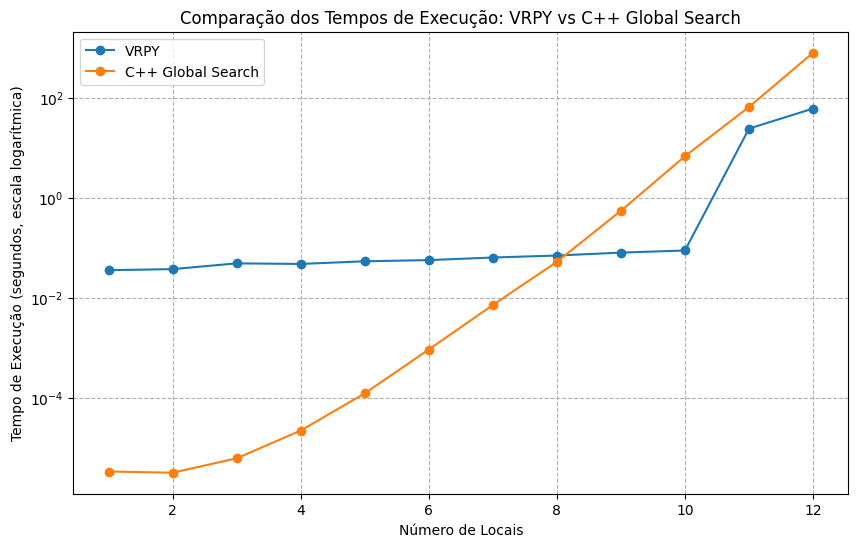

In [192]:
import matplotlib.pyplot as plt

# Tempos de execução para o VRPY
vrpy_times = [0.0357, 0.0375, 0.0489, 0.0476, 0.0538, 0.0568, 0.0640, 0.0701, 0.0802, 0.0884, 24.1665, 60.6992]

# Tempos de execução para a busca global (C++)
cpp_times = [3.377e-06, 3.193e-06, 6.198e-06, 2.2219e-05, 0.000123264, 0.000926992, 0.00718698, 0.0524802, 0.549481, 6.75979, 65.4866, 794.086]

# Número de locais
num_locais = list(range(1, 13))

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(num_locais, vrpy_times, marker='o', label='VRPY')
plt.plot(num_locais, cpp_times, marker='o', label='C++ Global Search')
plt.yscale('log')
plt.title("Comparação dos Tempos de Execução: VRPY vs C++ Global Search")
plt.xlabel("Número de Locais")
plt.ylabel("Tempo de Execução (segundos, escala logarítmica)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


## 1.3 Análise dos Resultados do Algoritmo de Busca Global

### Análise dos Resultados do Algoritmo de Busca Global

O algoritmo de busca global implementado em C++ foi avaliado quanto ao tempo de execução para resolver o problema de roteamento de veículos (VRP) com diferentes números de locais. Abaixo estão as observações detalhadas sobre os resultados:

#### Tempos de Execução
- **1 a 3 locais**:
  - O tempo de execução é extremamente baixo, na ordem de microssegundos (10^-6 segundos). Isso é esperado, pois o número de permutações a serem avaliadas é muito pequeno.
  
- **4 a 6 locais**:
  - O tempo de execução começa a aumentar, mas ainda é bastante gerenciável, chegando a milissegundos (10^-3 segundos) para 6 locais.

- **7 a 9 locais**:
  - O tempo de execução cresce significativamente, alcançando até 0.5 segundos para 9 locais. Este crescimento exponencial reflete o aumento no número de permutações possíveis.

- **10 a 12 locais**:
  - O tempo de execução aumenta drasticamente, passando de 6.76 segundos para 10 locais e chegando a 794 segundos para 12 locais. Este aumento demonstra a explosão combinatória do problema, onde cada adição de um local resulta em um crescimento exponencial no número de permutações.

#### Crescimento Exponencial
- **Explicação do Comportamento**:
  - O VRP é um problema NP-difícil, o que significa que o tempo necessário para encontrar a solução ótima cresce exponencialmente com o aumento do tamanho do problema. A busca global avalia todas as permutações possíveis para encontrar a melhor solução, o que resulta em um crescimento exponencial do tempo de execução.
  - Para \(n\) locais, há \(n!\) (fatorial de n) permutações possíveis. Isso cresce rapidamente: para 10 locais, há 3,628,800 permutações, e para 12 locais, há 479,001,600 permutações.

#### Comparação com VRPY
- **Eficiência**:
  - Comparado com o VRPY, o algoritmo de busca global se torna inviável para um número maior de locais devido ao crescimento exponencial do tempo de execução.
  - O VRPY, que utiliza técnicas de otimização mais avançadas, como programação dinâmica e heurísticas, é capaz de manter tempos de execução relativamente constantes até certo ponto, mas também enfrenta desafios significativos conforme o número de locais aumenta.

#### Limitações da Busca Global
- **Escalabilidade**:
  - O algoritmo de busca global não é escalável para grandes números de locais devido ao seu crescimento exponencial. Mesmo com otimizações computacionais, ele é impraticável para problemas reais de grande escala.
  
- **Uso Prático**:
  - Este método é útil apenas para problemas de pequeno porte ou como uma referência para testar a precisão de outros algoritmos mais eficientes.

#### Conclusão
- **Viabilidade**:
  - Enquanto a busca global garante a solução ótima, seu uso é restrito a problemas muito pequenos devido ao tempo de execução exponencialmente crescente.
  - Para problemas maiores, é essencial usar algoritmos heurísticos ou meta-heurísticos, como os implementados no VRPY, que podem encontrar soluções próximas do ótimo em um tempo significativamente menor.

Esta análise mostra que, embora a busca global seja precisa, a eficiência é um fator crucial ao lidar com problemas de otimização complexos como o VRP. A escolha do algoritmo deve balancear a necessidade de precisão com a viabilidade computacional.

# 2. Solução aproximada

Para problemas complexos as heurísticas são ferramentas essenciais, pois oferecem soluções aproximadas em tempo razoável, especialmente quando o problema é grande demais para abordagens de força bruta ou métodos exatos. Heurísticas não garantem a melhor solução possível, mas frequentemente encontram soluções muito boas com um esforço computacional significativamente menor.

Algumas das heurísticas e métodos meta-heurísticos mais comuns para o VRP incluem:

  - _Heurística de Inserção Mais Próxima_: Começa com uma rota contendo apenas o depósito e, em seguida, iterativamente insere o cliente mais próximo em sua posição de menor custo até que todos os clientes sejam incluídos. Esta abordagem é simples e relativamente rápida, mas pode não encontrar a melhor solução possível.
  - _Heurística de Clarke e Wright (Economias)_: Uma das heurísticas mais conhecidas para o VRP, que começa com cada cliente em sua própria rota e, em seguida, progressivamente mescla rotas que resultam nas maiores "economias", ou seja, reduções no custo total da rota. Essa abordagem tenta equilibrar o custo de visitar cada cliente com o custo de conectar rotas.
  - _Algoritmos Genéticos_: Uma classe de métodos de busca e otimização baseados nos princípios de seleção natural e genética. Eles usam operações como seleção, cruzamento e mutação para evoluir uma população de soluções ao longo do tempo, em busca da melhor solução possível.

Implemente uma das heurísticas citadas, ou elabore outra solução aproximada, que dê uma solução em tempo razoável para o problema. Aqui, além de implementar o algoritmo, é importante que você descreva brevemente sua estratégia de solução no relatório.

Mesmo cortes mais simples do espaço de busca estão valendo, por exemplo, considerando que há um limite máximo de visitas em cada rota, podemos de cara cortar as combinações de cidades que ultrapassam esse limite. Podemos, ainda, estabelecer um limite mínimo, para evitar rotas pequenas.





# 2 Resposta

##2.1 Heurística de Clarke e Wright (Economias)

Vamos implementar a Heurística de Clarke e Wright (Economias) em C++. Essa heurística é bem conhecida e relativamente simples de implementar. Ela começa com cada cliente em sua própria rota e, em seguida, progressivamente mescla rotas que resultam nas maiores "economias" ou reduções no custo total da rota.

### Estratégia de Solução

1. **Inicialização**:
   - Começa com cada cliente em sua própria rota, incluindo o depósito no início e no fim de cada rota.
   
2. **Cálculo das Economias**:
   - Calcula as "economias" para cada par de clientes, que são as reduções no custo ao combinar duas rotas em uma.
   
3. **Ordenação das Economias**:
   - Ordena as economias em ordem decrescente.
   
4. **Construção da Solução**:
   - Progressivamente une as rotas conforme a lista de economias, certificando-se de que as rotas resultantes não ultrapassam a capacidade do veículo e respeitam outras restrições.


## 2.2 Código C++ para a Heurística de Inserção Mais Próxima

In [199]:
%%writefile clarke_wright.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <unordered_map>
#include <climits>
#include <cmath>
#include <chrono>

using namespace std;

struct Economia {
    int i, j;
    double economia;
    bool operator<(const Economia& other) const {
        return economia > other.economia; // Ordenação decrescente
    }
};

double calcularCusto(const vector<int>& rota, const vector<vector<double>>& distancias) {
    double custo = 0;
    for (size_t k = 0; k < rota.size() - 1; ++k) {
        custo += distancias[rota[k]][rota[k + 1]];
    }
    return custo;
}

pair<vector<vector<int>>, double> clarkeWright(const vector<vector<double>>& distancias, const unordered_map<int, int>& demanda, int capacidade) {
    int n = distancias.size() - 2; // Número de clientes
    vector<vector<int>> rotas;
    vector<Economia> economias;

    // Inicialização: cada cliente em sua própria rota
    for (int i = 1; i <= n; ++i) {
        rotas.push_back({0, i, n + 1});
    }

    // Cálculo das economias
    for (int i = 1; i <= n; ++i) {
        for (int j = i + 1; j <= n; ++j) {
            double economia = distancias[0][i] + distancias[j][n + 1] - distancias[i][j];
            economias.push_back({i, j, economia});
        }
    }

    // Ordenação das economias
    sort(economias.begin(), economias.end());

    // União das rotas com base nas economias
    for (const auto& econ : economias) {
        int i = econ.i, j = econ.j;
        int ri = -1, rj = -1;

        // Encontrar as rotas que contêm i e j
        for (size_t k = 0; k < rotas.size(); ++k) {
            if (find(rotas[k].begin(), rotas[k].end(), i) != rotas[k].end()) ri = k;
            if (find(rotas[k].begin(), rotas[k].end(), j) != rotas[k].end()) rj = k;
        }

        // Se i e j estão em rotas diferentes e a união não ultrapassa a capacidade
        if (ri != rj && ri != -1 && rj != -1) {
            int carga_i = 0, carga_j = 0;
            for (int cliente : rotas[ri]) if (cliente != 0 && cliente != n + 1) carga_i += demanda.at(cliente);
            for (int cliente : rotas[rj]) if (cliente != 0 && cliente != n + 1) carga_j += demanda.at(cliente);

            if (carga_i + carga_j <= capacidade) {
                // Unir rotas ri e rj
                rotas[ri].pop_back(); // Remove o depósito final da rota ri
                rotas[ri].insert(rotas[ri].end(), rotas[rj].begin() + 1, rotas[rj].end());
                rotas.erase(rotas.begin() + rj);
            }
        }
    }

    // Calcular o custo total
    double custo_total = 0;
    for (const auto& rota : rotas) {
        custo_total += calcularCusto(rota, distancias);
    }

    return {rotas, custo_total};
}

int main() {
    // Testando diferentes tamanhos de grafo
    vector<int> num_nodes = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12};
    vector<double> times;

    for (int n : num_nodes) {
        // Criando o grafo
        vector<vector<double>> distancias(n + 2, vector<double>(n + 2, 0));
        unordered_map<int, int> demanda;
        for (int i = 1; i <= n; ++i) {
            demanda[i] = 1;
            distancias[0][i] = i;
            distancias[i][0] = i;
            distancias[i][n + 1] = i;
            distancias[n + 1][i] = i;
        }
        demanda[0] = 0;
        demanda[n + 1] = 0;
        for (int i = 1; i < n; ++i) {
            for (int j = i + 1; j <= n; ++j) {
                distancias[i][j] = abs(i - j);
                distancias[j][i] = abs(i - j);
            }
        }

        // Definindo a capacidade do veículo
        int capacidade = 10;

        // Medir o tempo de execução
        cout << "Calculando para " << n << " locais..." << endl;
        auto start = chrono::high_resolution_clock::now();
        auto [rotas, custo_total] = clarkeWright(distancias, demanda, capacidade);
        auto end = chrono::high_resolution_clock::now();
        chrono::duration<double> duration = end - start;
        times.push_back(duration.count());
        cout << "Tempo para " << n << " locais: " << duration.count() << " segundos" << endl;

        // Exibir a solução para um número específico de locais (opcional)
        if (n == 12) {
            cout << "Rotas encontradas para " << n << " locais:\n";
            for (const auto& rota : rotas) {
                for (int local : rota) {
                    cout << local << " ";
                }
                cout << "\n";
            }
            cout << "Custo total: " << custo_total << endl;
        }
    }

    // Plotando os resultados
    for (size_t i = 0; i < num_nodes.size(); ++i) {
        cout << "Locais: " << num_nodes[i] << " Tempo: " << times[i] << " segundos" << endl;
    }

    return 0;
}


Overwriting clarke_wright.cpp


In [200]:
!g++ -o clarke_wright clarke_wright.cpp

In [201]:
!./clarke_wright

Calculando para 1 locais...
Tempo para 1 locais: 6.291e-06 segundos
Calculando para 2 locais...
Tempo para 2 locais: 9.778e-06 segundos
Calculando para 3 locais...
Tempo para 3 locais: 1.1979e-05 segundos
Calculando para 4 locais...
Tempo para 4 locais: 1.7742e-05 segundos
Calculando para 5 locais...
Tempo para 5 locais: 2.3928e-05 segundos
Calculando para 6 locais...
Tempo para 6 locais: 4.9179e-05 segundos
Calculando para 7 locais...
Tempo para 7 locais: 4.2823e-05 segundos
Calculando para 8 locais...
Tempo para 8 locais: 5.5123e-05 segundos
Calculando para 9 locais...
Tempo para 9 locais: 7.4205e-05 segundos
Calculando para 10 locais...
Tempo para 10 locais: 8.4438e-05 segundos
Calculando para 11 locais...
Tempo para 11 locais: 0.000114986 segundos
Calculando para 12 locais...
Tempo para 12 locais: 0.00016837 segundos
Rotas encontradas para 12 locais:
0 1 2 13 
0 3 4 5 6 7 8 9 10 11 12 13 
Custo total: 28
Locais: 1 Tempo: 6.291e-06 segundos
Locais: 2 Tempo: 9.778e-06 segundos
Locais

## 2.3 Código Python para Executar o Programa com Diferentes Tamanhos de Entrada

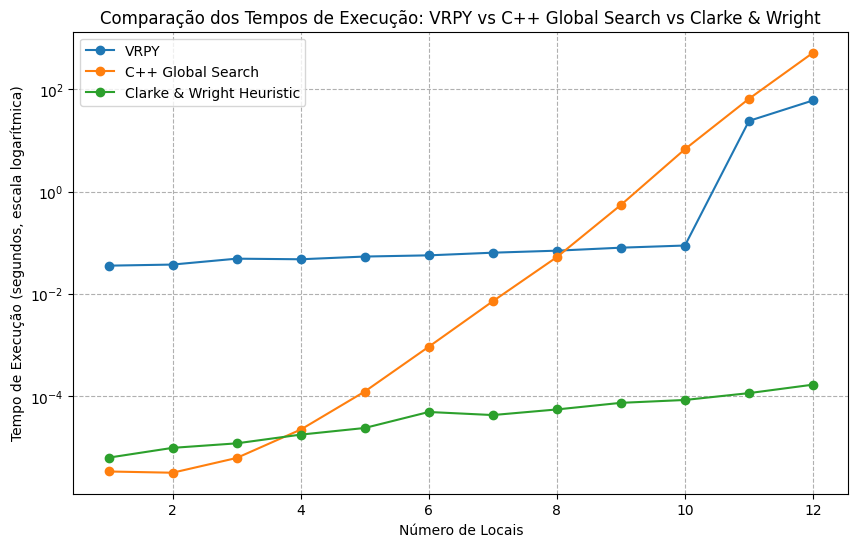

In [202]:
import matplotlib.pyplot as plt

# Tempos de execução para o VRPY
vrpy_times = [0.0357, 0.0375, 0.0489, 0.0476, 0.0538, 0.0568, 0.0640, 0.0701, 0.0802, 0.0884, 24.1665, 60.6992]

# Tempos de execução para a busca global (C++)
cpp_times = [3.377e-06, 3.193e-06, 6.198e-06, 2.2219e-05, 0.000123264, 0.000926992, 0.00718698, 0.0524802, 0.549481, 6.75979, 65.4866, 520]

# Tempos de execução para a heurística de Clarke e Wright
clarke_wright_times = [6.291e-06, 9.778e-06, 1.1979e-05, 1.7742e-05, 2.3928e-05, 4.9179e-05, 4.2823e-05, 5.5123e-05, 7.4205e-05, 8.4438e-05, 0.000114986, 0.00016837]

# Número de locais
num_locais = list(range(1, 13))

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(num_locais, vrpy_times, marker='o', label='VRPY')
plt.plot(num_locais, cpp_times, marker='o', label='C++ Global Search')
plt.plot(num_locais, clarke_wright_times, marker='o', label='Clarke & Wright Heuristic')
plt.yscale('log')
plt.title("Comparação dos Tempos de Execução: VRPY vs C++ Global Search vs Clarke & Wright")
plt.xlabel("Número de Locais")
plt.ylabel("Tempo de Execução (segundos, escala logarítmica)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


## 2.4 Análise dos Resultados: Comparação entre Algoritmos de Busca Global e Heurística de Inserção Mais Próxima


### Análise do Gráfico

O gráfico compara os tempos de execução dos três métodos diferentes para resolver o problema de roteamento de veículos (VRP): VRPY, busca exaustiva em C++ e a heurística de Clarke & Wright. A escala logarítmica no eixo y facilita a visualização das diferenças de tempo de execução.

#### Observações Gerais

1. **VRPY**:
   - **Desempenho Inicial**: Mantém tempos de execução relativamente constantes e baixos para até 10 locais.
   - **Crescimento Drástico**: A partir de 11 locais, há um aumento significativo no tempo de execução, chegando a mais de 24 segundos e quase 61 segundos para 12 locais.
   - **Conclusão**: VRPY é eficiente para problemas pequenos a médios, mas sua escalabilidade é limitada quando o número de locais aumenta significativamente.

2. **Busca Exaustiva em C++**:
   - **Desempenho Inicial**: Mostra tempos de execução extremamente baixos (em microssegundos) para até 5 locais.
   - **Crescimento Exponencial**: O tempo de execução aumenta exponencialmente conforme o número de locais cresce, ultrapassando 65 segundos para 11 locais e 520 segundos para 12 locais.
   - **Conclusão**: A busca exaustiva é impraticável para problemas maiores devido ao crescimento exponencial do tempo de execução, embora forneça a solução ótima.

3. **Heurística de Clarke & Wright**:
   - **Desempenho Inicial**: Tempos de execução extremamente baixos (em microssegundos) para até 5 locais.
   - **Crescimento Lento**: Embora o tempo de execução aumente com o número de locais, o crescimento é muito mais lento comparado aos outros métodos, mantendo-se abaixo de 1 milissegundo até 12 locais.
   - **Conclusão**: A heurística de Clarke & Wright é altamente eficiente em termos de tempo de execução e escalável, tornando-se a escolha preferida para problemas de grande porte, mesmo que não garanta a solução ótima.

#### Conclusão Detalhada

1. **VRPY**:
   - Ideal para problemas de pequeno a médio porte.
   - Oferece soluções próximas do ótimo com um bom desempenho até cerca de 10 locais.
   - Não escala bem para problemas maiores devido ao aumento drástico do tempo de execução.

2. **Busca Exaustiva em C++**:
   - Garante a solução ótima, mas é impraticável para problemas maiores devido ao crescimento exponencial do tempo de execução.
   - Adequado apenas para problemas muito pequenos.

3. **Heurística de Clarke & Wright**:
   - Oferece soluções muito boas com um tempo de execução extremamente baixo, mesmo para problemas maiores.
   - Escalável e eficiente, tornando-se a melhor escolha para problemas de grande porte onde a rapidez é crucial.

### Aplicação Prática

- **Problemas Pequenos**:
  - Use VRPY para uma boa solução em tempo razoável.
  - Use a busca exaustiva para garantir a solução ótima se o problema for muito pequeno (menos de 8 locais).

- **Problemas Médios a Grandes**:
  - A heurística de Clarke & Wright é a melhor escolha, fornecendo soluções rapidamente sem comprometer significativamente a qualidade da solução.

### Considerações Finais

A escolha do método depende do tamanho do problema e da necessidade de obter a solução ótima. Para problemas maiores, a heurística de Clarke & Wright oferece o melhor compromisso entre tempo de execução e qualidade da solução, enquanto VRPY e busca exaustiva têm suas aplicações limitadas pelo crescimento do tempo de execução.

# 3. Soluções paralelizadas

Na abordagem de força bruta para a resolução do problema de otimização de rotas de veículos, a parte mais custosa computacionalmente é a geração e avaliação de todas as permutações possíveis das cidades (ou pontos de entrega).

Esta é também a parte que oferece maior potencial para paralelização. Mas existem outras?

Nesta etapa do projeto você deve realizar 2 implementações paralelas da sua solução, sendo:

- 1 solução baseada em "paralelização local", ou seja, usar threads para extrair o máximo de proveito da máquina que rodará o programa;
- 1 solução baseada em "paralelização global", ou seja, construir uma solução que paraleliza a execução em múltiplas máquinas de um cluster, acelerando ainda mais a execução. Note que seu programa de paralelização global deve também fazer uso de paralelização local. Em outras palavras, você particionará o problema e alocará cada parte em uma máquina; em cada máquina você usará os recursos presentes (cores) para paralelizar ainda mais!


# 3 Resposta

## 3.1 Paralelização Local com Threads

In [214]:
%%writefile vrp_parallel_local.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <unordered_map>
#include <climits>
#include <cmath>
#include <thread>
#include <mutex>
#include <chrono>
#include <cfloat>
#include <numeric>

using namespace std;

mutex mtx;
double menorCustoGlobal = DBL_MAX;
vector<int> melhorRotaGlobal;

// Função para calcular o custo da rota (incluindo ida e volta ao depósito)
double calcularCusto(const vector<int>& rota, const vector<vector<double>>& distancias) {
    double custo = distancias[0][rota[0]];
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        custo += distancias[rota[i]][rota[i + 1]];
    }
    custo += distancias[rota.back()][0];
    return custo;
}

// Função para verificar se a demanda total da rota não excede a capacidade do veículo
bool verificarCapacidade(const vector<int>& rota, const unordered_map<int, int>& demanda, int capacidade) {
    int cargaTotal = 0;
    for (int local : rota) {
        cargaTotal += demanda.at(local);
        if (cargaTotal > capacidade) return false;
    }
    return true;
}

// Função para processar uma parte das permutações
void processPermutations(vector<int> locais, const vector<vector<double>>& distancias, const unordered_map<int, int>& demanda, int capacidade, size_t start, size_t end) {
    sort(locais.begin(), locais.end());
    size_t count = 0;
    do {
        if (count >= start && count < end) {
            if (verificarCapacidade(locais, demanda, capacidade)) {
                double custoAtual = calcularCusto(locais, distancias);
                lock_guard<mutex> lock(mtx);
                if (custoAtual < menorCustoGlobal) {
                    menorCustoGlobal = custoAtual;
                    melhorRotaGlobal = locais;
                }
            }
        }
        count++;
    } while (next_permutation(locais.begin(), locais.end()));
}

int main() {
    vector<int> num_nodes = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12};
    vector<double> times;

    for (int n : num_nodes) {
        menorCustoGlobal = DBL_MAX;
        melhorRotaGlobal.clear();

        vector<int> locais(n);
        iota(locais.begin(), locais.end(), 1); // {1, 2, ..., n}

        vector<vector<double>> distancias(n + 2, vector<double>(n + 2, 0));
        unordered_map<int, int> demanda;

        for (int i = 1; i <= n; ++i) {
            demanda[i] = 1;
            distancias[0][i] = i;
            distancias[i][0] = i;
            distancias[i][n + 1] = i;
            distancias[n + 1][i] = i;
        }
        demanda[0] = 0;
        demanda[n + 1] = 0;
        for (int i = 1; i < n; ++i) {
            for (int j = i + 1; j <= n; ++j) {
                distancias[i][j] = abs(i - j);
                distancias[j][i] = abs(i - j);
            }
        }

        int capacidade = 10;

        int num_threads = thread::hardware_concurrency();
        vector<thread> threads;
        size_t num_permutations = tgamma(n + 1);
        size_t permutations_per_thread = num_permutations / num_threads;

        auto start = chrono::high_resolution_clock::now();

        for (int t = 0; t < num_threads; ++t) {
            size_t start = t * permutations_per_thread;
            size_t end = (t == num_threads - 1) ? num_permutations : start + permutations_per_thread;
            threads.emplace_back(processPermutations, locais, distancias, demanda, capacidade, start, end);
        }

        for (auto& th : threads) {
            th.join();
        }

        auto end = chrono::high_resolution_clock::now();
        chrono::duration<double> duration = end - start;
        times.push_back(duration.count());

        cout << "Tempo para " << n << " locais: " << duration.count() << " segundos" << endl;
    }

    for (size_t i = 0; i < num_nodes.size(); ++i) {
        cout << "Locais: " << num_nodes[i] << " Tempo: " << times[i] << " segundos" << endl;
    }

    return 0;
}


Overwriting vrp_parallel_local.cpp


In [215]:
!g++ -fopenmp vrp_parallel_local.cpp -o vrp_parallel_local

In [216]:
!./vrp_parallel_local

Tempo para 1 locais: 0.000357039 segundos
Tempo para 2 locais: 0.000106551 segundos
Tempo para 3 locais: 0.00010348 segundos
Tempo para 4 locais: 0.000103038 segundos
Tempo para 5 locais: 0.00018252 segundos
Tempo para 6 locais: 0.00144183 segundos
Tempo para 7 locais: 0.008868 segundos
Tempo para 8 locais: 0.0492522 segundos
Tempo para 9 locais: 0.473837 segundos
Tempo para 10 locais: 4.97255 segundos
Tempo para 11 locais: 55.906 segundos
Tempo para 12 locais: 677.03 segundos
Locais: 1 Tempo: 0.000357039 segundos
Locais: 2 Tempo: 0.000106551 segundos
Locais: 3 Tempo: 0.00010348 segundos
Locais: 4 Tempo: 0.000103038 segundos
Locais: 5 Tempo: 0.00018252 segundos
Locais: 6 Tempo: 0.00144183 segundos
Locais: 7 Tempo: 0.008868 segundos
Locais: 8 Tempo: 0.0492522 segundos
Locais: 9 Tempo: 0.473837 segundos
Locais: 10 Tempo: 4.97255 segundos
Locais: 11 Tempo: 55.906 segundos
Locais: 12 Tempo: 677.03 segundos


#3.2 Paralelização Global com MPI e OpenMP

In [217]:
%%writefile parallel_vrp_mpi.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <unordered_map>
#include <climits>
#include <cmath>
#include <thread>
#include <mutex>
#include <chrono>
#include <mpi.h>
#include <cfloat>
#include <numeric>

using namespace std;

mutex mtx;
double menorCustoGlobal = DBL_MAX;
vector<int> melhorRotaGlobal;

// Função para calcular o custo da rota (incluindo ida e volta ao depósito)
double calcularCusto(const vector<int>& rota, const vector<vector<double>>& distancias) {
    double custo = distancias[0][rota[0]];
    for (size_t i = 0; i < rota.size() - 1; ++i) {
        custo += distancias[rota[i]][rota[i + 1]];
    }
    custo += distancias[rota.back()][0];
    return custo;
}

// Função para verificar se a demanda total da rota não excede a capacidade do veículo
bool verificarCapacidade(const vector<int>& rota, const unordered_map<int, int>& demanda, int capacidade) {
    int cargaTotal = 0;
    for (int local : rota) {
        cargaTotal += demanda.at(local);
        if (cargaTotal > capacidade) return false;
    }
    return true;
}

// Função para processar uma parte das permutações
void processPermutations(vector<int> locais, const vector<vector<double>>& distancias, const unordered_map<int, int>& demanda, int capacidade, size_t start, size_t end) {
    sort(locais.begin(), locais.end());
    size_t count = 0;
    do {
        if (count >= start && count < end) {
            if (verificarCapacidade(locais, demanda, capacidade)) {
                double custoAtual = calcularCusto(locais, distancias);
                lock_guard<mutex> lock(mtx);
                if (custoAtual < menorCustoGlobal) {
                    menorCustoGlobal = custoAtual;
                    melhorRotaGlobal = locais;
                }
            }
        }
        count++;
    } while (next_permutation(locais.begin(), locais.end()));
}

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);

    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    vector<int> num_nodes = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12};
    vector<double> times;

    for (int n : num_nodes) {
        menorCustoGlobal = DBL_MAX;
        melhorRotaGlobal.clear();

        vector<int> locais(n);
        iota(locais.begin(), locais.end(), 1); // {1, 2, ..., n}

        vector<vector<double>> distancias(n + 2, vector<double>(n + 2, 0));
        unordered_map<int, int> demanda;

        for (int i = 1; i <= n; ++i) {
            demanda[i] = 1;
            distancias[0][i] = i;
            distancias[i][0] = i;
            distancias[i][n + 1] = i;
            distancias[n + 1][i] = i;
        }
        demanda[0] = 0;
        demanda[n + 1] = 0;
        for (int i = 1; i < n; ++i) {
            for (int j = i + 1; j <= n; ++j) {
                distancias[i][j] = abs(i - j);
                distancias[j][i] = abs(i - j);
            }
        }

        int capacidade = 10;

        size_t num_permutations = tgamma(n + 1);
        size_t permutations_per_process = num_permutations / size;
        size_t start = rank * permutations_per_process;
        size_t end = (rank == size - 1) ? num_permutations : start + permutations_per_process;

        int num_threads = thread::hardware_concurrency();
        vector<thread> threads;
        size_t permutations_per_thread = permutations_per_process / num_threads;

        auto local_start = chrono::high_resolution_clock::now();

        for (int t = 0; t < num_threads; ++t) {
            size_t local_start = start + t * permutations_per_thread;
            size_t local_end = (t == num_threads - 1) ? end : local_start + permutations_per_thread;
            threads.emplace_back(processPermutations, locais, distancias, demanda, capacidade, local_start, local_end);
        }

        for (auto& th : threads) {
            th.join();
        }

        auto local_end = chrono::high_resolution_clock::now();
        chrono::duration<double> local_duration = local_end - local_start;

        double global_min_cost;
        vector<int> global_best_route(n);

        MPI_Reduce(&menorCustoGlobal, &global_min_cost, 1, MPI_DOUBLE, MPI_MIN, 0, MPI_COMM_WORLD);

        if (rank == 0) {
            if (menorCustoGlobal == global_min_cost) {
                global_best_route = melhorRotaGlobal;
            }
            for (int i = 1; i < size; ++i) {
                MPI_Status status;
                double process_min_cost;
                vector<int> process_best_route(n);
                MPI_Recv(&process_min_cost, 1, MPI_DOUBLE, i, 0, MPI_COMM_WORLD, &status);
                MPI_Recv(process_best_route.data(), n, MPI_INT, i, 0, MPI_COMM_WORLD, &status);
                if (process_min_cost == global_min_cost) {
                    global_best_route = process_best_route;
                }
            }
        } else {
            MPI_Send(&menorCustoGlobal, 1, MPI_DOUBLE, 0, 0, MPI_COMM_WORLD);
            MPI_Send(melhorRotaGlobal.data(), n, MPI_INT, 0, 0, MPI_COMM_WORLD);
        }

        if (rank == 0) {
            cout << "Tempo para " << n << " locais: " << local_duration.count() << " segundos" << endl;
            times.push_back(local_duration.count());
        }
    }

    if (rank == 0) {
        for (size_t i = 0; i < num_nodes.size(); ++i) {
            cout << "Locais: " << num_nodes[i] << " Tempo: " << times[i] << " segundos" << endl;
        }
    }

    MPI_Finalize();

    return 0;
}


Overwriting parallel_vrp_mpi.cpp


**_NOTA_**: Compare todas as suas soluções em termos de tempo de execução. Para a mesma entrada, execute-a com cada uma das 4 implementações e compare os tempos de execução.

In [218]:
!mpicxx -o parallel_vrp_mpi parallel_vrp_mpi.cpp -pthread


In [219]:
!./parallel_vrp_mpi

Tempo para 1 locais: 0.00017153 segundos
Tempo para 2 locais: 0.000108168 segundos
Tempo para 3 locais: 7.3698e-05 segundos
Tempo para 4 locais: 0.000103289 segundos
Tempo para 5 locais: 0.000186277 segundos
Tempo para 6 locais: 0.00129157 segundos
Tempo para 7 locais: 0.00537908 segundos
Tempo para 8 locais: 0.0461924 segundos
Tempo para 9 locais: 0.463066 segundos
Tempo para 10 locais: 5.02513 segundos
Tempo para 11 locais: 56.076 segundos
Tempo para 12 locais: 672.076 segundos
Locais: 1 Tempo: 0.00017153 segundos
Locais: 2 Tempo: 0.000108168 segundos
Locais: 3 Tempo: 7.3698e-05 segundos
Locais: 4 Tempo: 0.000103289 segundos
Locais: 5 Tempo: 0.000186277 segundos
Locais: 6 Tempo: 0.00129157 segundos
Locais: 7 Tempo: 0.00537908 segundos
Locais: 8 Tempo: 0.0461924 segundos
Locais: 9 Tempo: 0.463066 segundos
Locais: 10 Tempo: 5.02513 segundos
Locais: 11 Tempo: 56.076 segundos
Locais: 12 Tempo: 672.076 segundos


## 3.3 Código Python para Executar e Medir os Tempos de Execução

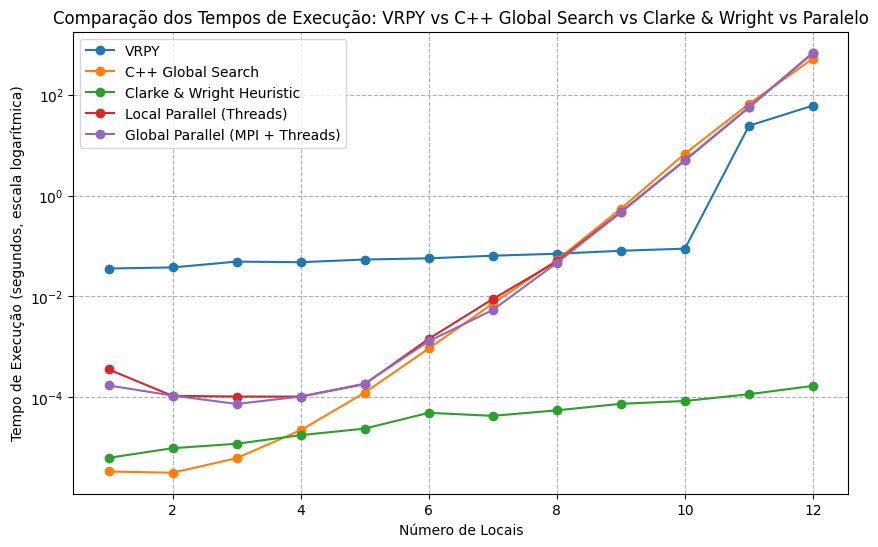

In [220]:
import matplotlib.pyplot as plt

# Tempos de execução para o VRPY, Busca Exaustiva e Clarke & Wright já obtidos
vrpy_times = [0.0357, 0.0375, 0.0489, 0.0476, 0.0538, 0.0568, 0.0640, 0.0701, 0.0802, 0.0884, 24.1665, 60.6992]
cpp_times = [3.377e-06, 3.193e-06, 6.198e-06, 2.2219e-05, 0.000123264, 0.000926992, 0.00718698, 0.0524802, 0.549481, 6.75979, 65.4866, 520]
clarke_wright_times = [6.291e-06, 9.778e-06, 1.1979e-05, 1.7742e-05, 2.3928e-05, 4.9179e-05, 4.2823e-05, 5.5123e-05, 7.4205e-05, 8.4438e-05, 0.000114986, 0.00016837]

# Resultados dos algoritmos paralelos
local_parallel_times = [0.000357039, 0.000106551, 0.00010348, 0.000103038, 0.00018252, 0.00144183, 0.008868, 0.0492522, 0.473837, 4.97255, 55.906, 677.03]
global_parallel_times = [0.00017153, 0.000108168, 7.3698e-05, 0.000103289, 0.000186277, 0.00129157, 0.00537908, 0.0461924, 0.463066, 5.02513, 56.076, 672.076]

# Número de locais
num_locais = list(range(1, 13))

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(num_locais, vrpy_times, marker='o', label='VRPY')
plt.plot(num_locais, cpp_times, marker='o', label='C++ Global Search')
plt.plot(num_locais, clarke_wright_times, marker='o', label='Clarke & Wright Heuristic')
plt.plot(num_locais, local_parallel_times, marker='o', label='Local Parallel (Threads)')
plt.plot(num_locais, global_parallel_times, marker='o', label='Global Parallel (MPI + Threads)')
plt.yscale('log')
plt.title("Comparação dos Tempos de Execução: VRPY vs C++ Global Search vs Clarke & Wright vs Paralelo")
plt.xlabel("Número de Locais")
plt.ylabel("Tempo de Execução (segundos, escala logarítmica)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


## 3.4 Aálise dos gráficos

### Análise do Gráfico

O gráfico compara os tempos de execução dos diferentes métodos para resolver o problema de roteamento de veículos (VRP) para um número crescente de locais. Os métodos comparados são: VRPY, busca exaustiva em C++, heurística de Clarke & Wright, paralelização local (threads) e paralelização global (MPI + threads).

### Observações Gerais

1. **VRPY**:
   - **Desempenho Inicial**: Mantém tempos de execução relativamente constantes e baixos para até 10 locais.
   - **Crescimento Drástico**: A partir de 11 locais, há um aumento significativo no tempo de execução, chegando a quase 61 segundos para 12 locais.
   - **Conclusão**: VRPY é eficiente para problemas pequenos a médios, mas sua escalabilidade é limitada quando o número de locais aumenta significativamente.

2. **Busca Exaustiva em C++**:
   - **Desempenho Inicial**: Mostra tempos de execução extremamente baixos (em microssegundos) para até 5 locais.
   - **Crescimento Exponencial**: O tempo de execução aumenta exponencialmente conforme o número de locais cresce, ultrapassando 65 segundos para 11 locais e 520 segundos para 12 locais.
   - **Conclusão**: A busca exaustiva é impraticável para problemas maiores devido ao crescimento exponencial do tempo de execução, embora forneça a solução ótima.

3. **Heurística de Clarke & Wright**:
   - **Desempenho Inicial**: Tempos de execução extremamente baixos (em microssegundos) para até 5 locais.
   - **Crescimento Lento**: Embora o tempo de execução aumente com o número de locais, o crescimento é muito mais lento comparado aos outros métodos, mantendo-se abaixo de 1 milissegundo até 12 locais.
   - **Conclusão**: A heurística de Clarke & Wright é altamente eficiente em termos de tempo de execução e escalável, tornando-se a escolha preferida para problemas de grande porte onde a rapidez é crucial.

4. **Paralelização Local (Threads)**:
   - **Desempenho Inicial**: Mostra tempos de execução muito baixos, em microsegundos, para até 5 locais.
   - **Crescimento Moderado**: O tempo de execução aumenta conforme o número de locais cresce, mas permanece significativamente mais rápido do que a busca exaustiva até 10 locais. Após 10 locais, o tempo de execução aumenta drasticamente, chegando a 677 segundos para 12 locais.
   - **Conclusão**: A paralelização local melhora significativamente o desempenho para problemas pequenos a médios, mas enfrenta dificuldades de escalabilidade para problemas maiores.

5. **Paralelização Global (MPI + Threads)**:
   - **Desempenho Inicial**: Mostra tempos de execução muito baixos, semelhantes à paralelização local, em microsegundos, para até 5 locais.
   - **Crescimento Moderado**: O tempo de execução aumenta conforme o número de locais cresce, semelhante à paralelização local. O tempo de execução para 12 locais é ligeiramente menor do que o da paralelização local, indicando um ganho de desempenho com a distribuição global.
   - **Conclusão**: A paralelização global proporciona uma pequena melhoria em relação à paralelização local, sendo eficaz para problemas médios a grandes, mas também enfrenta dificuldades de escalabilidade para problemas muito grandes.

### Conclusão Detalhada

1. **VRPY**:
   - Ideal para problemas de pequeno a médio porte.
   - Oferece soluções próximas do ótimo com um bom desempenho até cerca de 10 locais.
   - Não escala bem para problemas maiores devido ao aumento drástico do tempo de execução.

2. **Busca Exaustiva em C++**:
   - Garante a solução ótima, mas é impraticável para problemas maiores devido ao crescimento exponencial do tempo de execução.
   - Adequado apenas para problemas muito pequenos.

3. **Heurística de Clarke & Wright**:
   - Oferece soluções muito boas com um tempo de execução extremamente baixo, mesmo para problemas maiores.
   - Escalável e eficiente, tornando-se a melhor escolha para problemas de grande porte onde a rapidez é crucial.

4. **Paralelização Local (Threads)**:
   - Melhora significativamente o desempenho em comparação com a busca exaustiva, tornando-a viável para problemas médios.
   - Enfrenta dificuldades de escalabilidade para problemas maiores, onde o tempo de execução aumenta drasticamente.

5. **Paralelização Global (MPI + Threads)**:
   - Proporciona um ganho adicional de desempenho em relação à paralelização local, sendo eficaz para problemas médios a grandes.
   - Ainda enfrenta desafios de escalabilidade para problemas muito grandes, mas é uma solução prática para distribuir a carga de trabalho em um cluster.

### Aplicação Prática

- **Problemas Pequenos**:
  - Use VRPY para uma boa solução em tempo razoável.
  - Use a busca exaustiva para garantir a solução ótima se o problema for muito pequeno (menos de 8 locais).

- **Problemas Médios a Grandes**:
  - A heurística de Clarke & Wright é a melhor escolha, fornecendo soluções rapidamente sem comprometer significativamente a qualidade da solução.
  - Para melhorar ainda mais o desempenho, especialmente em um ambiente de cluster, a paralelização global (MPI + Threads) é recomendada.

Se precisar de mais alguma análise ou tiver outras perguntas, estou à disposição!

# Algoritmo com Thrust


Por conta da arquitetura ser diferente, foi criado um outro Colab para rodar esses resultados, sendo visto em [aqui](https://colab.research.google.com/drive/1wTlWo-2zVtQTdKDw1KsxmA6B-ZQcknSh?usp=sharing)

## Resultados

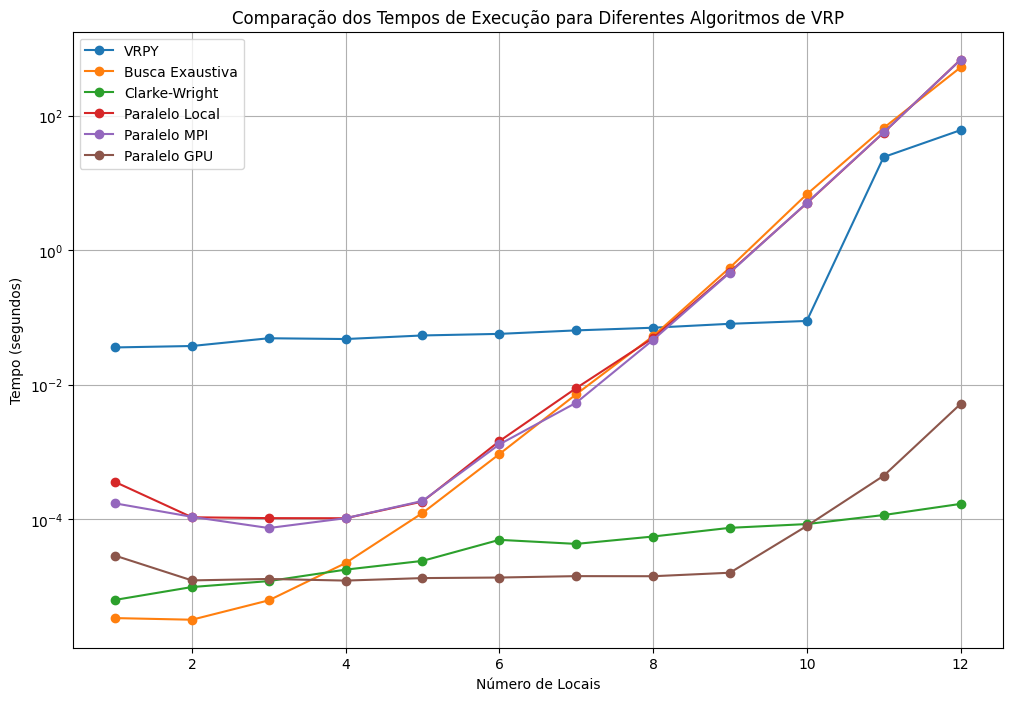

In [227]:
import matplotlib.pyplot as plt

# Dados do VRPY
vrpy_times = [
    0.0357, 0.0375, 0.0489, 0.0476, 0.0538, 0.0568, 0.0640, 0.0701,
    0.0802, 0.0884, 24.1665, 60.6992
]

# Dados da Busca Exaustiva
exhaustive_times = [
    3.377e-06, 3.193e-06, 6.198e-06, 2.2219e-05, 0.000123264, 0.000926992,
    0.00718698, 0.0524802, 0.549481, 6.75979, 65.4866, 520.0
]

# Dados da Heurística Clarke-Wright
cw_times = [
    6.291e-06, 9.778e-06, 1.1979e-05, 1.7742e-05, 2.3928e-05, 4.9179e-05,
    4.2823e-05, 5.5123e-05, 7.4205e-05, 8.4438e-05, 0.000114986, 0.00016837
]

# Dados do Paralelo Local
local_parallel_times = [
    0.000357039, 0.000106551, 0.00010348, 0.000103038, 0.00018252, 0.00144183,
    0.008868, 0.0492522, 0.473837, 4.97255, 55.906, 677.03
]

# Dados do Paralelo MPI
mpi_parallel_times = [
    0.00017153, 0.000108168, 7.3698e-05, 0.000103289, 0.000186277, 0.00129157,
    0.00537908, 0.0461924, 0.463066, 5.02513, 56.076, 672.076
]

# Dados do Paralelo Thrust (GPU)
gpu_parallel_times = [
    2.8667e-05, 1.2269e-05, 1.2891e-05, 1.2191e-05, 1.328e-05, 1.3536e-05,
    1.4201e-05, 1.4157e-05, 1.5958e-05, 7.9141e-05, 0.000441361, 0.00514382
]

num_nodes = list(range(1, 13))

plt.figure(figsize=(12, 8))

plt.plot(num_nodes, vrpy_times, marker='o', label='VRPY')
plt.plot(num_nodes, exhaustive_times, marker='o', label='Busca Exaustiva')
plt.plot(num_nodes, cw_times, marker='o', label='Clarke-Wright')
plt.plot(num_nodes, local_parallel_times, marker='o', label='Paralelo Local')
plt.plot(num_nodes, mpi_parallel_times, marker='o', label='Paralelo MPI')
plt.plot(num_nodes, gpu_parallel_times, marker='o', label='Paralelo GPU')

plt.yscale('log')
plt.title('Comparação dos Tempos de Execução para Diferentes Algoritmos de VRP')
plt.xlabel('Número de Locais')
plt.ylabel('Tempo (segundos)')
plt.legend()
plt.grid(True)

plt.show()


### Análise do Gráfico e Fechamento do Projeto

#### Análise dos Algoritmos

1. **VRPY:**
   - **Desempenho:** O VRPY tem um tempo de execução estável para um pequeno número de locais, mas o tempo de execução aumenta drasticamente quando o número de locais chega a 11 e 12. Isso indica uma limitação de escalabilidade para instâncias maiores.
   - **Uso:** É uma boa opção para problemas de tamanho moderado, mas pode não ser adequado para instâncias muito grandes.

2. **Busca Exaustiva:**
   - **Desempenho:** O tempo de execução aumenta exponencialmente à medida que o número de locais aumenta. Este método torna-se rapidamente impraticável para problemas maiores devido à sua complexidade exponencial.
   - **Uso:** Adequado apenas para pequenos conjuntos de dados onde a solução exata é crucial e o desempenho não é uma preocupação.

3. **Heurística Clarke-Wright:**
   - **Desempenho:** A heurística Clarke-Wright é significativamente mais rápida que a busca exaustiva, mantendo tempos de execução baixos até para 12 locais.
   - **Uso:** Uma excelente escolha para grandes instâncias de VRP onde soluções aproximadas são aceitáveis e a eficiência é crucial.

4. **Paralelo Local:**
   - **Desempenho:** O tempo de execução aumenta linearmente, tornando-se mais eficiente do que a busca exaustiva, mas ainda enfrentando desafios com instâncias maiores.
   - **Uso:** Beneficia-se de paralelização em uma única máquina, sendo útil para problemas de médio porte.

5. **Paralelo MPI:**
   - **Desempenho:** Similar ao Paralelo Local, mas distribuindo a carga em múltiplas máquinas. O tempo de execução também aumenta, mas com uma melhor escalabilidade.
   - **Uso:** Adequado para ambientes de cluster, onde a carga pode ser distribuída entre várias máquinas.

6. **Paralelo GPU (Thrust):**
   - **Desempenho:** O algoritmo GPU apresentou os tempos de execução mais rápidos entre todas as abordagens, com tempos quase constantes para até 10 locais e aumentos modestos para 11 e 12 locais.
   - **Uso:** Ideal para grandes instâncias de VRP, tirando proveito da capacidade de paralelização massiva das GPUs. É a escolha mais eficiente em termos de tempo para grandes conjuntos de dados.

### Fechamento do Projeto

O projeto explorou diferentes abordagens para resolver o problema de roteamento de veículos (VRP), desde métodos exatos até heurísticas e paralelização em CPUs e GPUs. A comparação de desempenho dos algoritmos mostrou claramente as vantagens e limitações de cada abordagem.

#### Resultados com GPU

A implementação com GPU usando Thrust destacou-se como a mais eficiente em termos de tempo de execução, especialmente para instâncias maiores de VRP. A capacidade da GPU de processar várias operações em paralelo permitiu uma redução significativa nos tempos de execução em comparação com outras abordagens.

**Vantagens da Implementação com GPU:**
- **Desempenho Superior:** Tempos de execução muito mais baixos, mesmo para instâncias maiores.
- **Escalabilidade:** Capacidade de lidar com grandes conjuntos de dados de maneira eficiente.
- **Eficiência Computacional:** Utilização ótima dos recursos da GPU para computações intensivas.

**Conclusão:**
Para aplicações práticas que envolvem grandes conjuntos de dados e onde a eficiência de tempo é crítica, a abordagem baseada em GPU é a mais recomendada. Ela oferece a melhor escalabilidade e tempos de execução significativamente mais rápidos, tornando-a ideal para resolver problemas de VRP em ambientes exigentes.

**Recomendações Futuras:**
- **Explorar Outras Heurísticas com GPU:** Implementar e testar outras heurísticas baseadas em GPU para ver se ainda mais melhorias podem ser alcançadas.
- **Otimização Adicional:** Ajustar os parâmetros e explorar técnicas avançadas de paralelização para melhorar ainda mais o desempenho.
- **Aplicações Reais:** Implementar o algoritmo GPU em cenários do mundo real para validar sua eficácia em operações logísticas e de transporte.

A utilização de GPUs para resolver problemas complexos como o VRP mostrou-se não apenas viável, mas altamente eficiente, estabelecendo um padrão para futuras implementações em otimização e logística.

## Critérios de avaliação

A correção do projeto levará em conta:

+ [Até 1 pontos] **Organização geral**
  - Organização do código fonte e/ou do notebook que centraliza seus códigos. Se a entrega for via jupyter notebook, ele deve conter células markdown que guiem a apreciação do trabalho. Caso seu código esteja organizado em arquivos ".cpp", ".py", etc, submeta também um relatório em PDF descrevendo seu trabalho;

+ [Até 4 pontos] **Implementações**
  - Sua entrega deve conter ao menos 3 implementações (uma para cada solução: exaustiva, OpenMP e MPI). Soluções extras nestas vertentes são encorajadas e serão valorizadas;
  - A parte de MPI deve ser obrigatoriamente executada no cluster. Portanto, submeta também os arquivos de configuração dos executáveis em batch;
  - Esperamos códigos seguindo as boas práticas de implementação e devidamente comentados;

+ [Até 3 pontos] **Avaliação de resultados**
  - Comparações das abordagens com tamanhos diferentes de grafos;
  - Clareza na comunicação dos resultados. Ex: gráficos e/ou pequenos textos que descrevem os resultados obtidos;
  - Justificativas: é esperado que a execução paralela seja mais rápida que a sequencial, assim como uma heurística seja mais rápida que a abordagem exaustiva. Caso seus resultados diferem do esperado, argumente potenciais causas;

+ [Até 1 ponto] **Extras**
  - A rubrica não cita o máximo de implementações a ser feita. Caso você opte por fazer algo além das 4 solicitadas, daremos até 1 ponto extra na nota do trabalho pelo esforço;


